In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dftools

Welcome to JupyROOT 6.18/00


In [2]:
plt.style.use("cms")
plt.rcParams.update({
    "font.size": 10,
    "figure.figsize": (3, 2.25),
})

In [3]:
df = pd.read_csv("data/tau_sf_id.csv")
df

,label,vars,var0_min,var0_max,value,stat_up,stat_down,syst_up,syst_down
0,VLoose,pt,0,20,0.000000,0.000000,0.000000,0.0,0.0
1,VLoose,pt,20,25,0.906044,0.129120,0.129120,0.0,0.0
2,VLoose,pt,25,30,0.930496,0.059652,0.059652,0.0,0.0
3,VLoose,pt,30,35,0.941875,0.046701,0.046701,0.0,0.0
4,VLoose,pt,35,40,0.865647,0.049769,0.049769,0.0,0.0
5,VLoose,pt,40,500,0.994398,0.043456,0.077670,0.0,0.0
6,VLoose,pt,500,10000,0.994398,0.000000,0.000000,0.0,0.0
7,Loose,pt,0,20,0.000000,0.000000,0.000000,0.0,0.0
8,Loose,pt,20,25,0.945513,0.092440,0.092440,0.0,0.0
9,Loose,pt,25,30,0.884697,0.071576,0.071576,0.0,0.0


In [4]:
def draw1d(df, ax, labels, kwargs):
    xbins = np.array(sorted(set(list(df["var0_min"])+list(df["var0_max"]))))
    xcent = (xbins[1:] + xbins[:-1])/2.

    ax.errorbar(
        xcent, df["value"], 
        xerr = (df["xlow"], df["xhigh"]),
        yerr = (df["unc_up"], df["unc_down"]),
        fmt='o', color='black',
    )
    
    ax.set_xscale(kwargs.get("xscale", "linear"))
    ax.set_yscale(kwargs.get("yscale", "linear"))
    
    ax.set_xlim(kwargs.get("xlim", (xbins.min(), xbins.max())))
    ax.set_ylim(kwargs.get("ylim", (None, None)))
    ax.set_xlabel(labels["x"])
    ax.set_ylabel(labels["y"])
    
    from matplotlib.ticker import ScalarFormatter
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.set_xticks(kwargs.get("xbins", xbins))
    
    
    
    dftools.draw.cms_label(ax, "") #"Preliminary")

/home/hep/sdb15/miniconda2/envs/zinv37/lib/python3.7/site-packages/pandas/core/indexing.py:1404: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


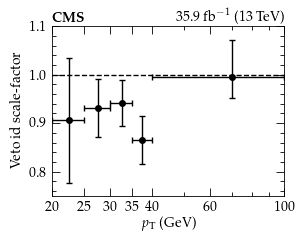

In [5]:
df = pd.read_csv("data/tau_sf_id.csv").set_index(["label", "vars"]).loc[("VLoose", "pt"),:]
df = df.loc[(df["var0_min"]>0.) & (df["var0_max"]<1000.),:]
df.loc[(df["var0_max"]==500.),"var0_max"] = 100.
df["unc_up"] = df.eval("sqrt(stat_up**2 + syst_up**2)")
df["unc_down"] = df.eval("sqrt(stat_down**2 + syst_down**2)")
df["xlow"] = df.eval("(var0_max - var0_min)/2.")
df["xhigh"] = df.eval("(var0_max - var0_min)/2.")
fig, ax = plt.subplots()
draw1d(
    df, ax,
    {"x": r'$p_{\mathrm{T}}$ (GeV)', "y": r'Veto id scale-factor'},
    {"xscale": "log", "ylim": (0.75, 1.1), "xbins": [20, 25, 30, 35, 40, 60, 100]},
)
ax.axhline(1., lw=1, ls='--', color='black')
fig.savefig("plots/tau_id_veto_sf.pdf")

/home/hep/sdb15/miniconda2/envs/zinv37/lib/python3.7/site-packages/pandas/core/indexing.py:1404: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


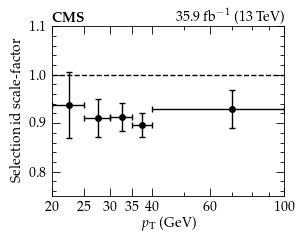

In [6]:
df = pd.read_csv("data/tau_sf_id.csv").set_index(["label", "vars"]).loc[("Tight", "pt"),:]
df = df.loc[(df["var0_min"]>0.) & (df["var0_max"]<1000.),:]
df.loc[(df["var0_max"]==500.),"var0_max"] = 100.
df["unc_up"] = df.eval("sqrt(stat_up**2 + syst_up**2)")
df["unc_down"] = df.eval("sqrt(stat_down**2 + syst_down**2)")
df["xlow"] = df.eval("(var0_max - var0_min)/2.")
df["xhigh"] = df.eval("(var0_max - var0_min)/2.")
fig, ax = plt.subplots()
draw1d(
    df, ax,
    {"x": r'$p_{\mathrm{T}}$ (GeV)', "y": r'Selection id scale-factor'},
    {"xscale": "log", "ylim": (0.75, 1.1), "xbins": [20, 25, 30, 35, 40, 60, 100]},
)
ax.axhline(1., lw=1, ls='--', color='black')
fig.savefig("plots/tau_id_tight_sf.pdf")